In [222]:
import pandas as pd
import math
import numpy as np
import operator

In [2]:
data=pd.DataFrame.from_csv('./data_export_cobercat/data_export_1-2015.csv')
#imports info from csv

In [3]:
d=data.drop(['incident','downloadSpeed','uploadSpeed'],1)
#Removes choosen columns (0:row, 1:column) 

In [4]:
d

,date,lat,lng,signal_inst,signal_min,signal_max,signal_avg,carrier,fullCarrier,status,net,net_type,lac,cid,psc,speed,satellites,precision1,provider,activity
timestamp,,,,,,,,,,,,,,,,,,,,
1449356375000,2015-12-05 23:59:35.000000,26.66748,-81.88311,31,31,31,31,T-Mobile,T-Mobile,2,13.0,4G,33121,17562114,0,44.9,1,31,gps,0
1449356368337,2015-12-05 23:59:28.337000,42.25159,1.86371,12,12,16,12,pepephone,movistar,0,15.0,3G,860,79191379,-1,5.0,0,134,fused,2
1449356352411,2015-12-05 23:59:12.411000,-9.40254,-38.21590,7,7,7,7,VIVO,VIVO,2,15.0,3G,40175,17796053,45,1.6,2,63,fused,3
1449356343918,2015-12-05 23:59:03.918000,41.15327,0.82813,12,5,99,12,Orange,orange,2,10.0,3G,2150,17551221,93,0.0,0,24,fused,5
1449356337000,2015-12-05 23:58:57.000000,41.70663,2.40211,3,1,3,2,Movistar,movistar,2,15.0,3G,867,164375746,109,0.1,5,15,gps,5
1449356334084,2015-12-05 23:58:54.084000,41.98277,2.81148,12,12,12,12,Orange,orange,0,13.0,4G,2140,15071499,326,0.3,2,128,gps,3
1449356327000,2015-12-05 23:58:47.000000,26.66710,-81.88912,31,31,31,31,T-Mobile,T-Mobile,2,13.0,4G,33121,17562114,0,30.0,0,67,gps,3
1449356314000,2015-12-05 23:58:34.000000,41.19183,1.60886,8,8,8,8,Movistar,movistar,2,13.0,4G,43610,110082580,0,0.0,3,18,gps,3
1449356307116,2015-12-05 23:58:27.116000,41.42331,2.16138,31,31,31,31,NaN,NaN,-1,0.0,NaN,-1,-1,-1,0.0,7,48,gps,5


In [5]:
def getDate(i):
    return d['date'].iloc[i-1]
    #Returns the date of the choosen position

In [234]:
from dateutil import parser
dt = parser.parse(getDate(1))
#Converts string to date
print dt

<type 'datetime.datetime'>


In [91]:
def getPosition(i):
    return (d.iloc[i]['lat'],data.iloc[i]['lng'])
    #Returns a tuple with the coordinates of the choosen position

In [114]:
import random
import webbrowser
def mapPosition():
    for i in range(10):
        pos=getPosition(random.randint(1,10000))
        url='http://maps.google.com/maps?q='+str(pos[0])+','+str(pos[1])
        #Shows the location in Google Maps
        webbrowser.open(url)


In [115]:
mapPosition()

In [231]:
import matplotlib.pyplot as plt

In [232]:
x=[]
y=[]
for i in range(len(d.index)):
    pos=getPosition(i)
    x.append(pos[0])
    y.append(pos[1])

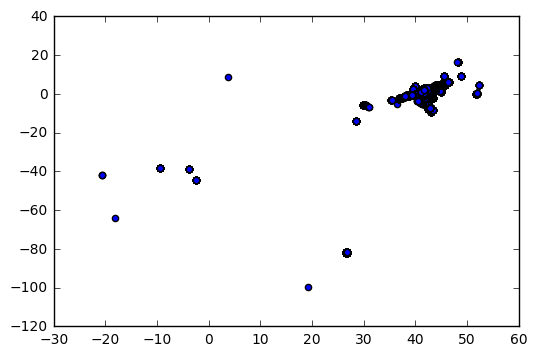

In [233]:
plt.scatter(x,y)
#Plots all coordinates into a grid
plt.show()

In [122]:
dp=pd.DataFrame(data=d,columns=[['date','lat','lng']])
print dp

                                     date       lat       lng
timestamp                                                    
1449356375000  2015-12-05 23:59:35.000000  26.66748 -81.88311
1449356368337  2015-12-05 23:59:28.337000  42.25159   1.86371
1449356352411  2015-12-05 23:59:12.411000  -9.40254 -38.21590
1449356343918  2015-12-05 23:59:03.918000  41.15327   0.82813
1449356337000  2015-12-05 23:58:57.000000  41.70663   2.40211
1449356334084  2015-12-05 23:58:54.084000  41.98277   2.81148
1449356327000  2015-12-05 23:58:47.000000  26.66710 -81.88912
1449356314000  2015-12-05 23:58:34.000000  41.19183   1.60886
1449356307116  2015-12-05 23:58:27.116000  41.42331   2.16138
1449356298000  2015-12-05 23:58:18.000000  41.72718   2.16099
1449356270000  2015-12-05 23:57:50.000000  26.66303 -81.88761
1449356256000  2015-12-05 23:57:36.000000  41.72688   2.16057
1449356231996  2015-12-05 23:57:11.996000  42.26854   2.96604
1449356221984  2015-12-05 23:57:01.984000  42.26873   2.96586
14493562

In [132]:
pd.DataFrame(data=d,columns=[['carrier','signal_avg','signal_min','signal_max']])

,carrier,signal_avg,signal_min,signal_max
timestamp,,,,
1449356375000,T-Mobile,31,31,31
1449356368337,pepephone,12,12,16
1449356352411,VIVO,7,7,7
1449356343918,Orange,12,5,99
1449356337000,Movistar,2,1,3
1449356334084,Orange,12,12,12
1449356327000,T-Mobile,31,31,31
1449356314000,Movistar,8,8,8
1449356307116,NaN,31,31,31


In [133]:
pd.DataFrame(data=d,columns=[['date','signal_avg','signal_min','signal_max']])

,date,signal_avg,signal_min,signal_max
timestamp,,,,
1449356375000,2015-12-05 23:59:35.000000,31,31,31
1449356368337,2015-12-05 23:59:28.337000,12,12,16
1449356352411,2015-12-05 23:59:12.411000,7,7,7
1449356343918,2015-12-05 23:59:03.918000,12,5,99
1449356337000,2015-12-05 23:58:57.000000,2,1,3
1449356334084,2015-12-05 23:58:54.084000,12,12,12
1449356327000,2015-12-05 23:58:47.000000,31,31,31
1449356314000,2015-12-05 23:58:34.000000,8,8,8
1449356307116,2015-12-05 23:58:27.116000,31,31,31


In [134]:
pd.DataFrame(data=d,columns=[['lat','lng','signal_avg','signal_min','signal_max']])

,lat,lng,signal_avg,signal_min,signal_max
timestamp,,,,,
1449356375000,26.66748,-81.88311,31,31,31
1449356368337,42.25159,1.86371,12,12,16
1449356352411,-9.40254,-38.21590,7,7,7
1449356343918,41.15327,0.82813,12,5,99
1449356337000,41.70663,2.40211,2,1,3
1449356334084,41.98277,2.81148,12,12,12
1449356327000,26.66710,-81.88912,31,31,31
1449356314000,41.19183,1.60886,8,8,8
1449356307116,41.42331,2.16138,31,31,31


In [136]:
info=pd.DataFrame(data=d,columns=[['date','carrier','lat','lng','signal_avg','signal_min','signal_max']])

In [157]:
def carr():
    carriers=[]
    for i in range(len(info.index)):
        if not info.iloc[i]['carrier'] in carriers:
            carriers.append(info.iloc[i]['carrier'])
    return carriers

In [165]:
carriers = carr()

In [215]:
def sign_avg(carriers):
    signal=dict([(key, []) for key in carriers])
    for i in range(len(info.index)):
        signal[info.iloc[i]['carrier']].append(info.iloc[i]['signal_avg'])
    av_s=dict([(key, 0) for key in carriers])
    for i in signal:
        temp=np.array(signal[i])
        av_s[i]=np.mean(temp)
    return av_s

In [216]:
signal_avg=sign_avg(carriers)

In [217]:
def sign_min(carriers):
    signal=dict([(key, []) for key in carriers])
    for i in range(len(info.index)):
        signal[info.iloc[i]['carrier']].append(info.iloc[i]['signal_min'])
    av_s=dict([(key, 0) for key in carriers])
    for i in signal:
        temp=np.array(signal[i])
        av_s[i]=np.mean(temp)
    return av_s

In [218]:
signal_min=sign_min(carriers)

In [219]:
def sign_max(carriers):
    signal=dict([(key, []) for key in carriers])
    for i in range(len(info.index)):
        signal[info.iloc[i]['carrier']].append(info.iloc[i]['signal_max'])
    av_s=dict([(key, 0) for key in carriers])
    for i in signal:
        temp=np.array(signal[i])
        av_s[i]=np.mean(temp)
    return av_s

In [220]:
signal_max=sign_max(carriers)

In [225]:
sorted_avg = sorted(signal_avg.items(), key=operator.itemgetter(1))
sorted_min = sorted(signal_min.items(), key=operator.itemgetter(1))
sorted_max = sorted(signal_max.items(), key=operator.itemgetter(1))

In [227]:
print sorted_avg

[('TELCEL', 5.0), ('Sense servei.', 8.7272727272727266), ("Nom\xc3\xa9s trucades d'emerg\xc3\xa8ncia", 10.652777777777779), ('Orange SP', 11.380952380952381), ('JAZZTEL', 11.74517788255465), ('vodafone UK', 11.884615384615385), ('TICAE', 12.24640657084189), ('pepephone', 12.743890518084067), ('Yoigo', 12.875728155339806), ('TIM', 12.888888888888889), ('Swisscom', 12.924528301886792), ('Orange F', 12.976102941176471), ('ENTEL', 13.0), ('movistar', 13.12405183312263), ('VIVO', 13.276190476190477), ('vodafone NL', 13.333333333333334), ('Movistar', 13.501722410121507), ('Telefonica Moviles Espana', 13.592986184909671), ('YOIGO', 13.683037974683545), ('simyo', 13.726069246435845), ('Orange', 13.818187200284175), ('Lebara', 14.0), ('RACC', 14.290482076637824), ('F SFR', 14.73134328358209), ('Tuenti', 15.011650485436894), ('vodafone ES', 15.027396119576984), ('Jazztel', 15.248633879781421), ('ONO', 15.36283185840708), ('I WIND', 15.622641509433961), ('GurbTec', 15.951807228915662), ('Lowi', 1

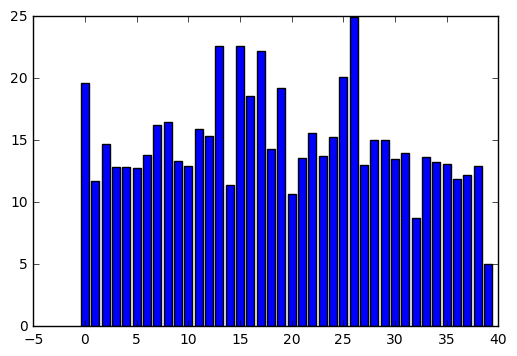

In [271]:
plt.bar(range(len(signal_avg)), signal_avg.values(), align='center')
plt.show()

In [228]:
print sorted_min

[('TELCEL', 0.0), ('Sense servei.', 3.0909090909090908), ('TIM', 3.7037037037037037), ('ENTEL', 5.0), ('vodafone NL', 5.333333333333333), ('vodafone UK', 6.9102564102564106), ('Orange SP', 9.0), ("Nom\xc3\xa9s trucades d'emerg\xc3\xa8ncia", 9.1944444444444446), ('JAZZTEL', 9.4721388769824255), ('Yoigo', 9.6330097087378643), ('TICAE', 9.7186858316221763), ('Swisscom', 9.7924528301886795), ('YOIGO', 9.962025316455696), ('movistar', 10.498261694058154), ('pepephone', 10.794721407624634), ('Orange', 10.808122668876917), ('Movistar', 10.827602405110861), ('simyo', 11.156822810590631), ('Telefonica Moviles Espana', 11.183846971307121), ('VIVO', 11.780952380952382), ('Orange F', 11.977941176470589), ('Lowi', 12.048582995951417), ('vodafone ES', 12.440086601715381), ('Tuenti', 12.471844660194174), ('RACC', 12.721878862793572), ('I WIND', 12.867924528301886), ('PARLEM', 13.083333333333334), ('ONO', 13.274336283185841), ('Jazztel', 13.737704918032787), ('F SFR', 13.753731343283581), ('Lebara', 1

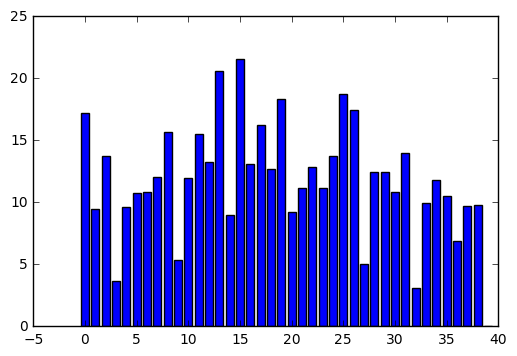

In [276]:
plt.bar(range(len(signal_min)), signal_min.values(), align='center')
plt.show()

In [229]:
print sorted_max

[("Nom\xc3\xa9s trucades d'emerg\xc3\xa8ncia", 13.791666666666666), ('Lebara', 14.0), ('Orange F', 15.209558823529411), ('VIVO', 15.477551020408164), ('pepephone', 15.880417073965461), ('F SFR', 15.932835820895523), ('JAZZTEL', 15.973639091298757), ('TICAE', 16.449691991786448), ('Swisscom', 16.471698113207548), ('GurbTec', 16.481927710843372), ('Sense servei.', 16.545454545454547), ('RACC', 16.929542645241039), ('Jazztel', 16.934426229508198), ('Orange SP', 17.095238095238095), ('Telefonica Moviles Espana', 17.41020191285866), ('movistar', 17.564001264222505), ('simyo', 17.627291242362524), ('MOBILAND', 17.864000000000001), ('Tuenti', 18.052427184466019), ('I WIND', 18.075471698113208), ('Movistar', 18.139984968057121), ('Yoigo', 18.258252427184466), ('ONO', 18.663716814159294), ('Orange', 18.667515244804925), ('vodafone ES', 19.589224748105586), ('F-Bouygues Telecom', 20.722222222222221), ('YOIGO', 21.687594936708862), ('MetroPCS', 22.136103151862464), ('T-Mobile', 23.736434108527131

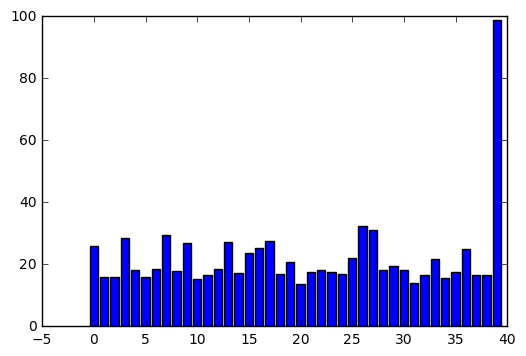

In [273]:
plt.bar(range(len(signal_max)), signal_max.values(), align='center')
plt.show()

In [260]:
def hour_avg():
    hour=range(24)
    signal=dict([(key, []) for key in hour])
    for i in range(len(info.index)):
        dt = parser.parse(getDate(i))
        signal[dt.hour].append(info.iloc[i]['signal_avg'])
    av_s=dict([(key, 0) for key in hour])
    for i in signal:
        temp=np.array(signal[i])
        av_s[i]=np.mean(temp)
    return av_s

In [262]:
hour_avg=hour_avg()

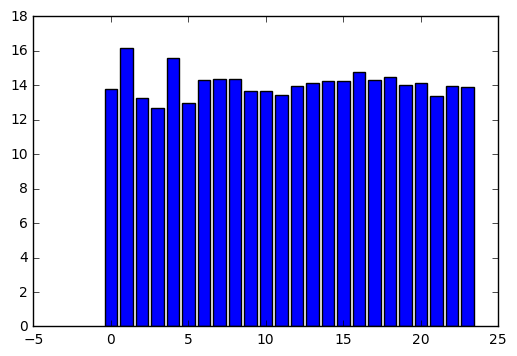

In [264]:
plt.bar(range(len(hour_avg)), hour_avg.values(), align='center')
plt.show()

In [265]:
def hour_min():
    hour=range(24)
    signal=dict([(key, []) for key in hour])
    for i in range(len(info.index)):
        dt = parser.parse(getDate(i))
        signal[dt.hour].append(info.iloc[i]['signal_min'])
    av_s=dict([(key, 0) for key in hour])
    for i in signal:
        temp=np.array(signal[i])
        av_s[i]=np.mean(temp)
    return av_s

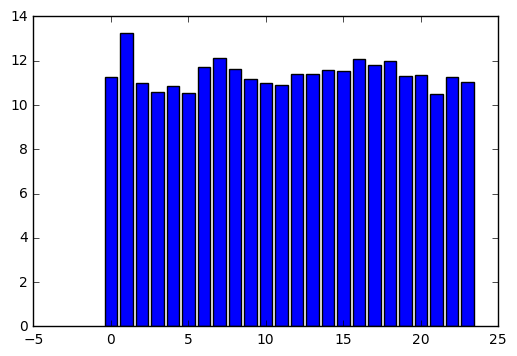

In [266]:
hour_min=hour_min()
plt.bar(range(len(hour_min)), hour_min.values(), align='center')
plt.show()

In [267]:
def hour_max():
    hour=range(24)
    signal=dict([(key, []) for key in hour])
    for i in range(len(info.index)):
        dt = parser.parse(getDate(i))
        signal[dt.hour].append(info.iloc[i]['signal_max'])
    av_s=dict([(key, 0) for key in hour])
    for i in signal:
        temp=np.array(signal[i])
        av_s[i]=np.mean(temp)
    return av_s

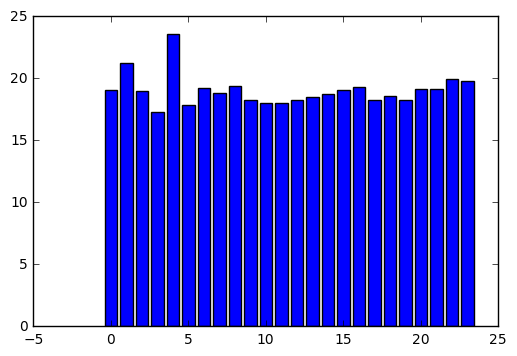

In [268]:
hour_max=hour_max()
plt.bar(range(len(hour_max)), hour_max.values(), align='center')
plt.show()

In [302]:
def hour_carrier_avg():
    hour=range(24)
    signal=dict([(key, []) for key in hour])
    for i in range(len(info.index)):
        dt = parser.parse(getDate(i))
        signal[dt.hour].append(info.iloc[i]['signal_max'])
    av_s=dict([(key, 0) for key in hour])
    for i in signal:
        temp=np.array(signal[i])
        av_s[i]=np.max(temp)
    av_c=dict([(key, []) for key in hour])
    for i in range(len(info.index)):
        dt = parser.parse(getDate(i))
        if(info.iloc[i]['signal_max']==av_s[dt.hour]):
            if(info.iloc[i]['carrier'] not in  av_c[dt.hour]):
                av_c[dt.hour].append(info.iloc[i]['carrier'])
    return av_c

In [306]:
print hour_carrier_avg()

{0: ['vodafone ES', 'JAZZTEL', 'pepephone', 'Orange', 'Movistar', 'Yoigo', nan, 'YOIGO', 'TICAE'], 1: ['Movistar', 'Orange', 'vodafone ES', 'Orange F', nan, 'movistar', 'YOIGO'], 2: ['YOIGO', 'vodafone ES', 'Movistar', nan], 3: ['Movistar', nan, 'JAZZTEL'], 4: [nan, 'vodafone ES', 'Orange', 'Movistar', 'TICAE'], 5: ['YOIGO', 'Movistar', 'Orange', 'vodafone ES', 'pepephone', nan, 'TICAE'], 6: ['movistar', nan, 'Movistar', 'vodafone ES', 'YOIGO', 'pepephone', 'Orange', 'Yoigo'], 7: ['movistar', 'YOIGO', 'vodafone ES', 'Movistar', 'simyo', nan, 'Orange', 'TICAE', 'JAZZTEL', 'Yoigo', 'pepephone'], 8: ['Movistar', 'Orange', 'movistar', 'simyo', nan, 'YOIGO', 'JAZZTEL', 'vodafone ES', 'Telefonica Moviles Espana', 'pepephone', 'TELCEL', 'Yoigo'], 9: ['movistar', 'JAZZTEL', 'Movistar', nan, 'vodafone ES', 'Orange', 'TICAE', 'Lowi', 'YOIGO', 'Yoigo', 'pepephone'], 10: ['Movistar', 'Orange F', 'Orange', 'vodafone ES', 'movistar', nan, 'YOIGO', 'JAZZTEL', 'Telefonica Moviles Espana', 'Lowi'], 11:

In [304]:
def hour_carrier_min():
    hour=range(24)
    signal=dict([(key, []) for key in hour])
    for i in range(len(info.index)):
        dt = parser.parse(getDate(i))
        signal[dt.hour].append(info.iloc[i]['signal_max'])
    min_s=dict([(key, 0) for key in hour])
    for i in signal:
        temp=np.array(signal[i])
        min_s[i]=np.max(temp)
    min_c=dict([(key, []) for key in hour])
    for i in range(len(info.index)):
        dt = parser.parse(getDate(i))
        if(info.iloc[i]['signal_max']==min_s[dt.hour]):
            if(info.iloc[i]['carrier'] not in  min_c[dt.hour]):
                min_c[dt.hour].append(info.iloc[i]['carrier'])
    return min_c

In [308]:
print hour_carrier_min()

{0: ['vodafone ES', 'JAZZTEL', 'pepephone', 'Orange', 'Movistar', 'Yoigo', nan, 'YOIGO', 'TICAE'], 1: ['Movistar', 'Orange', 'vodafone ES', 'Orange F', nan, 'movistar', 'YOIGO'], 2: ['YOIGO', 'vodafone ES', 'Movistar', nan], 3: ['Movistar', nan, 'JAZZTEL'], 4: [nan, 'vodafone ES', 'Orange', 'Movistar', 'TICAE'], 5: ['YOIGO', 'Movistar', 'Orange', 'vodafone ES', 'pepephone', nan, 'TICAE'], 6: ['movistar', nan, 'Movistar', 'vodafone ES', 'YOIGO', 'pepephone', 'Orange', 'Yoigo'], 7: ['movistar', 'YOIGO', 'vodafone ES', 'Movistar', 'simyo', nan, 'Orange', 'TICAE', 'JAZZTEL', 'Yoigo', 'pepephone'], 8: ['Movistar', 'Orange', 'movistar', 'simyo', nan, 'YOIGO', 'JAZZTEL', 'vodafone ES', 'Telefonica Moviles Espana', 'pepephone', 'TELCEL', 'Yoigo'], 9: ['movistar', 'JAZZTEL', 'Movistar', nan, 'vodafone ES', 'Orange', 'TICAE', 'Lowi', 'YOIGO', 'Yoigo', 'pepephone'], 10: ['Movistar', 'Orange F', 'Orange', 'vodafone ES', 'movistar', nan, 'YOIGO', 'JAZZTEL', 'Telefonica Moviles Espana', 'Lowi'], 11:

In [300]:
def hour_carrier_max():
    hour=range(24)
    signal=dict([(key, []) for key in hour])
    for i in range(len(info.index)):
        dt = parser.parse(getDate(i))
        signal[dt.hour].append(info.iloc[i]['signal_max'])
    max_s=dict([(key, 0) for key in hour])
    for i in signal:
        temp=np.array(signal[i])
        max_s[i]=np.max(temp)
    max_c=dict([(key, []) for key in hour])
    for i in range(len(info.index)):
        dt = parser.parse(getDate(i))
        if(info.iloc[i]['signal_max']==max_s[dt.hour]):
            if(info.iloc[i]['carrier'] not in  max_c[dt.hour]):
                max_c[dt.hour].append(info.iloc[i]['carrier'])
    return max_c

In [301]:
print hour_carrier_max()

{0: ['vodafone ES', 'JAZZTEL', 'pepephone', 'Orange', 'Movistar', 'Yoigo', nan, 'YOIGO', 'TICAE'], 1: ['Movistar', 'Orange', 'vodafone ES', 'Orange F', nan, 'movistar', 'YOIGO'], 2: ['YOIGO', 'vodafone ES', 'Movistar', nan], 3: ['Movistar', nan, 'JAZZTEL'], 4: [nan, 'vodafone ES', 'Orange', 'Movistar', 'TICAE'], 5: ['YOIGO', 'Movistar', 'Orange', 'vodafone ES', 'pepephone', nan, 'TICAE'], 6: ['movistar', nan, 'Movistar', 'vodafone ES', 'YOIGO', 'pepephone', 'Orange', 'Yoigo'], 7: ['movistar', 'YOIGO', 'vodafone ES', 'Movistar', 'simyo', nan, 'Orange', 'TICAE', 'JAZZTEL', 'Yoigo', 'pepephone'], 8: ['Movistar', 'Orange', 'movistar', 'simyo', nan, 'YOIGO', 'JAZZTEL', 'vodafone ES', 'Telefonica Moviles Espana', 'pepephone', 'TELCEL', 'Yoigo'], 9: ['movistar', 'JAZZTEL', 'Movistar', nan, 'vodafone ES', 'Orange', 'TICAE', 'Lowi', 'YOIGO', 'Yoigo', 'pepephone'], 10: ['Movistar', 'Orange F', 'Orange', 'vodafone ES', 'movistar', nan, 'YOIGO', 'JAZZTEL', 'Telefonica Moviles Espana', 'Lowi'], 11: